In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image

In [2]:
print(tf.config.list_physical_devices('GPU'))
print("GPU:", len(tf.config.list_physical_devices('GPU')))
print("Tensorflow Version", tf.__version__)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU: 1
Tensorflow Version 2.6.0


In [3]:
batch_size = 32
img_height = 224
img_width = 224

In [4]:
data_dir = r"D:\Project\resized_data\edible_mushroom"

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10872 files belonging to 10 classes.
Using 8698 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10872 files belonging to 10 classes.
Using 2174 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Auricularia_auricula', 'Auricularia_polytricha', 'Cantharellus_cibarius', 'Dacryopinax_spathularia', 'Hericium_cirrhatum', 'Lactarius_piperatus', 'Lactarius_volemus', 'Lentinula_edodes', 'Schizophyllum_commune', 'Strobilomyces_strobilaceus']


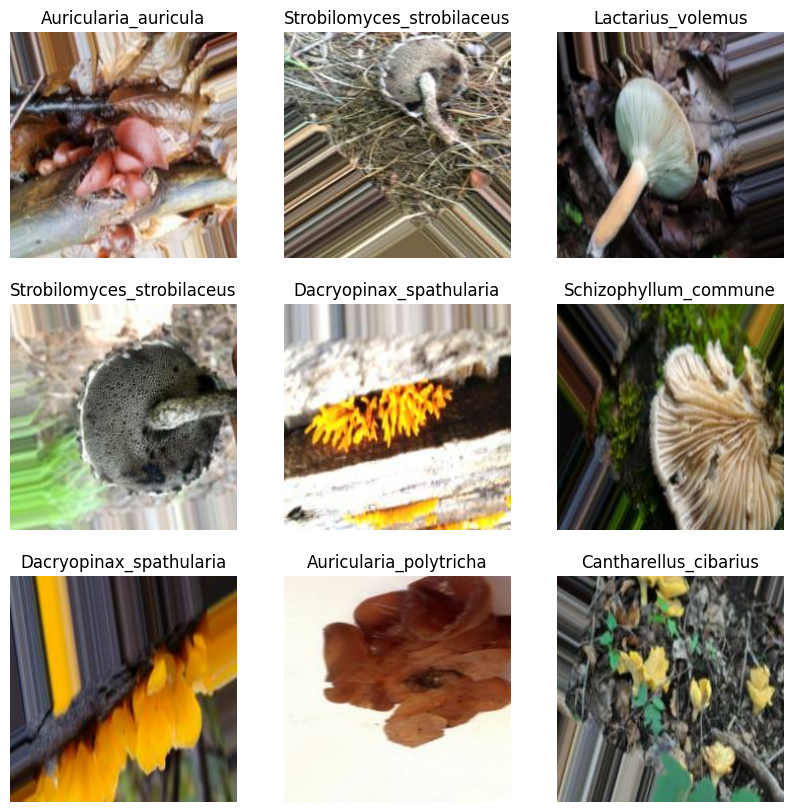

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [10]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 173056)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_ds, epochs=20, 
                    validation_data=val_ds)

Epoch 1/20
272/272 [==============================] - 46s 119ms/step - loss: 19.8928 - accuracy: 0.3528 - val_loss: 1.9966 - val_accuracy: 0.3717
Epoch 2/20
272/272 [==============================] - 31s 112ms/step - loss: 1.5496 - accuracy: 0.4816 - val_loss: 1.6620 - val_accuracy: 0.4328
Epoch 3/20
272/272 [==============================] - 31s 114ms/step - loss: 1.1312 - accuracy: 0.6072 - val_loss: 1.9077 - val_accuracy: 0.3868
Epoch 4/20
272/272 [==============================] - 30s 109ms/step - loss: 0.7276 - accuracy: 0.7526 - val_loss: 2.7192 - val_accuracy: 0.3928
Epoch 5/20
272/272 [==============================] - 31s 112ms/step - loss: 0.4154 - accuracy: 0.8656 - val_loss: 3.5238 - val_accuracy: 0.3638
Epoch 6/20
272/272 [==============================] - 30s 108ms/step - loss: 0.2438 - accuracy: 0.9246 - val_loss: 4.5074 - val_accuracy: 0.3689
Epoch 7/20
272/272 [==============================] - 30s 108ms/step - loss: 0.2494 - accuracy: 0.9345 - val_loss: 4.0877 - val_a

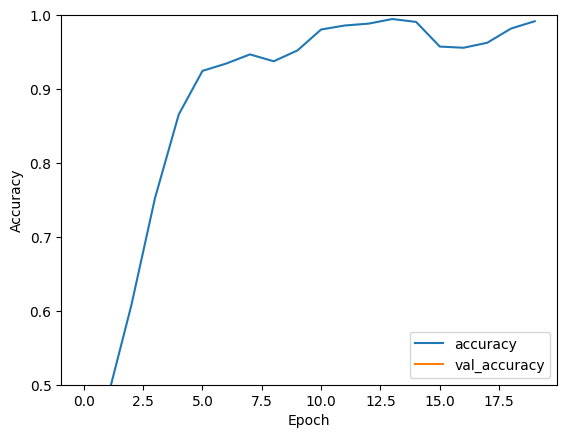

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

68/68 - 4s - loss: 9.6631 - accuracy: 0.3358


In [16]:
print(test_acc)

0.3357865810394287


In [17]:
import IPython
import shutil

# Save the notebook
IPython.display.display(IPython.display.Javascript('IPython.notebook.save_checkpoint();'))

# Copy the notebook (change the filename if needed)
shutil.copy2("cnn_e10_gpu_v2.ipynb", "cnn_e20_gpu.ipynb")

print("Notebook saved and copied successfully.")

<IPython.core.display.Javascript object>

Notebook saved and copied successfully.


In [ ]:
os._exit(00)